In [28]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as ss
from pandas_datareader import DataReader

In [12]:
TSLA = yf.download("TSLA", start="2020-01-01", end="2020-12-31", interval="1d")
TSLA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


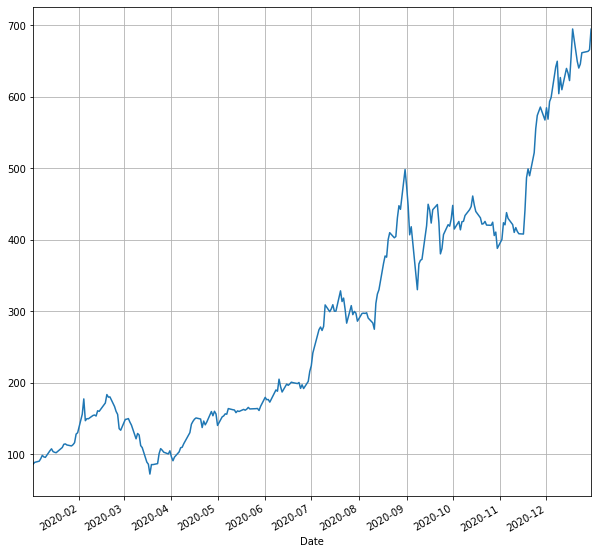

In [17]:
TSLA['Adj Close'].plot(figsize=(10,10),grid =True)

## Compute daily returns

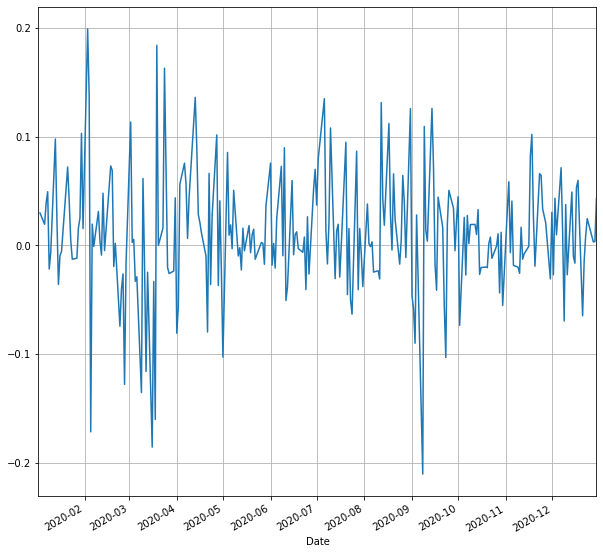

In [18]:
TSLA['returns'] = TSLA['Adj Close'].pct_change()
TSLA['returns'].plot(figsize=(10,10),grid=True)

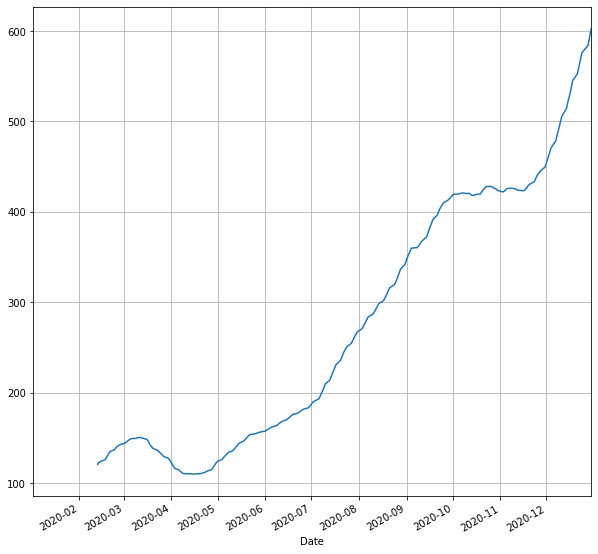

In [20]:
#Moving average
TSLA['30d'] = TSLA['Adj Close'].rolling(window=30, center=False).mean()
TSLA['30d'].plot(figsize=(10,10),grid=True)

## Autocorrelation function test to check is the time series is stationary

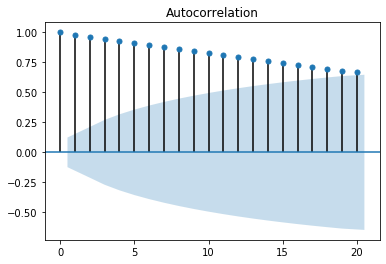

In [13]:
plot_acf(TSLA['Close'], lags=20)
plt.show()

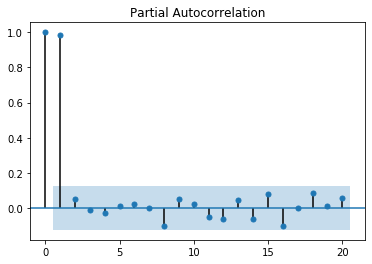

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(TSLA['Close'], lags=20)
plt.show()

## Augmented Dickey-Fuller test

In [36]:
from statsmodels.tsa.stattools import adfuller
ADF_results = adfuller(TSLA['Close'])
ADF_results

(0.724085780202166,
 0.9903064868359885,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 1987.394520513646)

## TSLA Stock is not Stationary

## ORDINARY LEAST SQUARE REGRESSION (Code below is from 0301 and onwards)

In [16]:
start_date = datetime(2020,1,1)
end_date = datetime(2020,12,31)
#TSLA = yf.download('T',start_date ,end_date)
Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.shape[0];
SPY = yf.download('SPY',start_date ,end_date)
F = np.diff(np.log(SPY['Adj Close'].values))
'Add Constant to X'
X = np.column_stack([np.ones((T,1)), np.linspace(1,T,T), F])
# 'Add Time Trend to X'
# X = np.column_stack([np.linspace(1,T,T), F])
N = X.shape[1]
'REGRESSION STARTS:'       
'Linear Regression of Y: T x 1 on' 
'Regressors X: T x N'
invXX = np.linalg.inv(X.transpose()@X)
'OLS estimator beta: N x 1'
beta_hat = invXX@X.transpose()@Y
'Predictive value of Y_t using OLS'  
y_hat = X@beta_hat;       
'Residuals from OLS: Y - X*beta'        
residuals = Y - y_hat;            
'variance of Y_t or residuals'
sigma2 = (1/(T-2))*(residuals.transpose()@residuals)
'standard deviation of Y_t or residuals'
sig = np.sqrt(sigma2) 
'variance-covariance matrix of beta_hat'
'N x N: on-diagnal variance(beta_j)'
'N x N: off-diagnal cov(beta_i, beta_j)'
varcov_beta_hat = (sigma2)*invXX
var_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
'Calculate R-square'
R_square = 1 - residuals.transpose()@residuals/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N)
'Test Each Coefficient: beta_i'
't-test stat: N x 1'
t_stat = (beta_hat.transpose()-0)/var_beta_hat
' t-test significance level: N x 1'
p_val_t = 1-ss.norm.cdf(t_stat)
'Test of Joint Significance of Model'
F_stat = beta_hat.transpose()@varcov_beta_hat@beta_hat/\
         (residuals.transpose()@residuals)
'size: (1 x N)*(N x N)*(N x 1)/((1 x T) * (T x 1)) = 1 x 1'
p_val_F = 1-ss.chi2.cdf(F_stat,T-N)
REPORT = np.column_stack([beta_hat, t_stat,p_val_t])
print('Regression Statistics')
print('------------------------\n')
print(' REGRESSION STATISTICS  \n') 
print('------------------------\n')
print('beta             t_stat            p_val\n')
print(REPORT)
print('\n Joint significance of all coefficients\n',[F_stat,p_val_F])
print('R-Square is       \n',R_square)
print('Adjusted R Square \n',adj_R_square)
print('Standard Error    \n',sig)
print('Observations      \n',T) 
print('-------------------------\n')

[*********************100%***********************]  1 of 1 completed
Regression Statistics
------------------------

 REGRESSION STATISTICS  

------------------------

beta             t_stat            p_val

[[ 9.96121246e-03  1.00743591e-01  4.59877003e-01]
 [-1.94429133e-05 -2.85526322e-02  5.11389305e-01]
 [ 1.32047974e+00  5.68164497e-01  2.84961638e-01]]

 Joint significance of all coefficients
 [0.06210021651935964, 1.0]
R-Square is       
 0.2455192105178956
Adjusted R Square 
 0.23943468802207224
Standard Error    
 0.04926189316934688
Observations      
 251
-------------------------



## OLS REGRESSION

In [30]:
TSLA = DataReader('TSLA',  'yahoo', datetime(2020,1,1), datetime(2020,12,31))
Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.shape[0];

SPY = DataReader('SPY',  'yahoo', datetime(2020,1,1), datetime(2020,12,31))
F1 = np.diff(np.log(SPY['Adj Close'].values))
QQQ = DataReader('QQQ',  'yahoo', datetime(2020,1,1), datetime(2020,12,31))
F2 = np.diff(np.log(QQQ['Adj Close'].values))

'Add Constant to X'
X = np.column_stack([np.ones((T,1)), F1, F2])
N = X.shape[1]

'OLS REGRESSION STARTS'
'Linear Regression of Y: T x 1 on'
'Regressors X: T x N'
invXX = np.linalg.inv(X.transpose()@X)
'OLS estimates for coefficients: X x 1'
beta_hat = invXX@X.transpose()@Y
'Predictive value of Y using OLS'
y_hat = X@beta_hat
'Residuals from OLS'
residuals = Y - y_hat
'Variance of residuals'
sigma2 = (1/T)*residuals.transpose()@residuals
'standard deviation of Y or residuals'
sigma = np.sqrt(sigma2)

'variance-covariance matrix of beta_hat'
varcov_beta_hat = (sigma2)*invXX
std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

'Calculate R-square'
R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N)

'Test Each Coefficient: beta_i'
'Null Hypothesis: beta_i = 0'
t_stat = (beta_hat.transpose()-0)/std_beta_hat
p_val_t = 1-ss.norm.cdf(t_stat)

'Test of Joint Significance of Model'
F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N)/\
         (residuals.transpose()@residuals/(T-N))

p_val_F = 1-ss.f.cdf(F_stat,N-1,T-N)


REPORT = np.column_stack([beta_hat, t_stat,p_val_t])
print('Regression Statistics')
print('------------------------\n')
print(' REGRESSION STATISTICS  \n') 
print('------------------------\n')
print('beta             t_stat            p_val\n')
print(REPORT)
print('\n Joint significance of all coefficients\n',[F_stat,p_val_F])
print('R-Square is       \n',R_square)
print('Adjusted R Square \n',adj_R_square)
print('Standard Error    \n',sig)
print('Observations      \n',T) 
print('-------------------------\n')

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/TSLA/history?period1=1577869200&period2=1609491599&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

## Isolation Forest

In [31]:
from sklearn.ensemble import IsolationForest


# Stock Selection 
LIST = ['AMZN','TSLA','NFLX','GS','WISH','NIO','ROKU','MS','EBAY','VIAC','NVDA']
startdate = datetime(2021,1,1)
enddate = datetime(2021,5,31)
FACTOR = ['SPY', 'QQQ']        
N = len(LIST)
PORTFOLIO = pd.DataFrame(columns = LIST) 
for n in range(0, N):
 PRICE = DataReader(LIST[n], 'yahoo', startdate,enddate)
 RETURN = np.diff(np.log(PRICE['Adj Close'].values))
 PORTFOLIO[LIST[n]] = RETURN
 
 # First Pass - TIME SERIES
 T = PORTFOLIO.shape[0]
 SPY = DataReader(FACTOR[0], 'yahoo', startdate,enddate)
 F1 = np.diff(np.log(SPY['Adj Close'].values))
 QQQ = DataReader(FACTOR[1], 'yahoo', startdate,enddate)
 F2 = np.diff(np.log(QQQ['Adj Close'].values))
 X = np.asmatrix(np.column_stack([np.ones((T,1)), F1, F2]))
 K = X.shape[1]
 
beta = np.zeros([K,N])
Y = np.zeros([T,N]) 
for n in range(0, N):
    Y[:,n] = PORTFOLIO[LIST[n]].values
    #Linear Regression of Y: T x 1 on 
    # Regressors X: T x N
    invXX = np.linalg.inv(X.transpose()@X)
    #OLS estimator beta: N x 1'
    beta[:,n] = invXX@X.transpose()@Y[:,n]


fig = plt.figure(figsize = (10, 7))    
plt.scatter(beta[0,:], beta[1,:], color = 'b', s = 60)
plt.xlabel('beta to SPY')
plt.ylabel('beta to QQQ')
plt.scatter(beta[0,:][beta[1,:]>1], beta[1,:][beta[1,:]>1], color = 'r', s= 100)
plt.show()

model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

model.fit(beta.transpose())
scores = model.decision_function(beta.transpose())
pred = model.predict(beta.transpose())

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AMZN/history?period1=1609491600&period2=1622534399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

## Clustering

In [32]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering

# Stock Selection 
LIST = ['AMZN','TSLA','NFLX','GS','WISH','NIO','ROKU','MS','EBAY','VIAC','NVDA']
startdate = datetime(2021,1,1)
enddate = datetime(2021,5,31)
FACTOR = ['SPY', 'QQQ']        
N = len(LIST)
PORTFOLIO = pd.DataFrame(columns = LIST) 
for n in range(0, N):
 PRICE = DataReader(LIST[n], 'yahoo', startdate,enddate)
 RETURN = np.diff(np.log(PRICE['Adj Close'].values))
 PORTFOLIO[LIST[n]] = RETURN
 
 # First Pass - TIME SERIES
 T = PORTFOLIO.shape[0]
 SPY = DataReader(FACTOR[0], 'yahoo', startdate,enddate)
 F1 = np.diff(np.log(SPY['Adj Close'].values))
 QQQ = DataReader(FACTOR[1], 'yahoo', startdate,enddate)
 F2 = np.diff(np.log(QQQ['Adj Close'].values))
 X = np.asmatrix(np.column_stack([np.ones((T,1)), F1, F2]))
 K = X.shape[1]
 
beta = np.zeros([K,N])
Y = np.zeros([T,N]) 
for n in range(0, N):
    Y[:,n] = PORTFOLIO[LIST[n]].values
    #Linear Regression of Y: T x 1 on 
    # Regressors X: T x N
    invXX = np.linalg.inv(X.transpose()@X)
    #OLS estimator beta: N x 1'
    beta[:,n] = invXX@X.transpose()@Y[:,n]


X = beta.transpose()
# AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()        


# K Mean Clustering
from sklearn.cluster import KMeans
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AMZN/history?period1=1609491600&period2=1622534399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [2]:
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts
import quandl

# Fetching financial data for two securities from Quandl
data1 = quandl.get("CHRIS/MCX_AL1", start_date="2014-04-01", api_key= '') 
data2 = quandl.get("CHRIS/MCX_PB1", start_date="2014-04-01", api_key= '') 

# Printing the first 5 rows of our fetched data
print(data1.head())
print(data2.head())

# Performing ADF test on the closing prices of fetched data
result = stat.OLS(data1['Close'], data2['Close']).fit()
c_t= ts.adfuller(result.resid)

# Checking Co-integration
if c_t[0]<= c_t[4]['10%'] and c_t[1]<= 0.1:    
print("Pair of securities is co-integrated") 
else:    
print("Pair of securities is not co-integrated")

IndentationError: expected an indented block (<ipython-input-2-f9de148af41d>, line 19)